# Cube de données G353 N2H+ feathered isolated contsub crop

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop.fits")
cube = HDU[0].data
header = HDU[0].header

In [3]:
cube.shape

(40, 960, 960)

INFO: Auto-setting vmin to -5.540e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.722e-01 [aplpy.core]


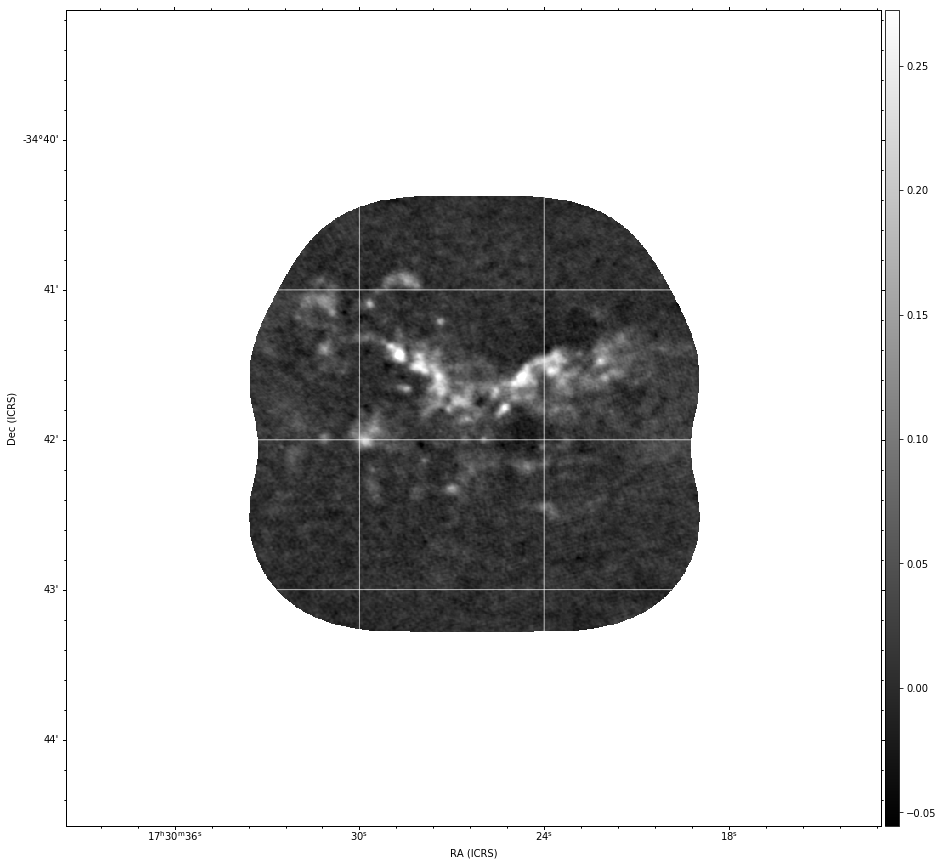

In [4]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop.fits",figure=fig_all,slices=[30])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [6]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits'
coord = np.array([267,299,6,686,640,39])
subfits(input1,output,coord)

Dimensions 420 342 34


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -4.854e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.092e-01 [aplpy.core]


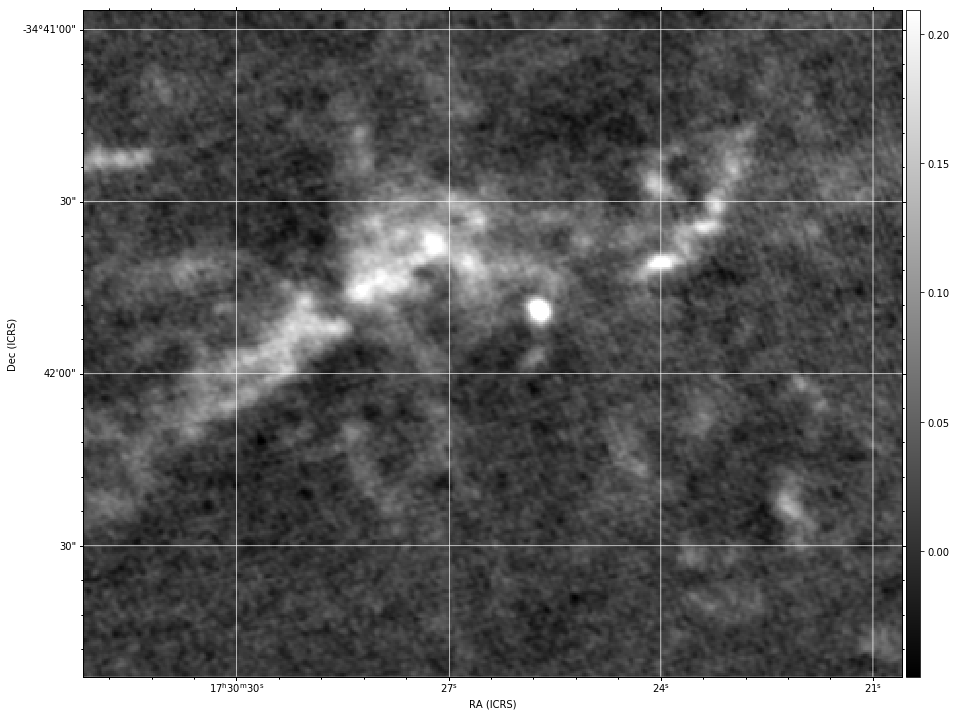

In [8]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits",figure=fig_all,slices=[15])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [9]:
cube.shape

(34, 342, 420)

In [3]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [4]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale((34, 500,600))

wt, S11a, wave_k, S1a, q =  fan_trans(cube[15,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([500,600]))

  0%|          | 0/22 [00:00<?, ?it/s]

600 500


100%|██████████| 22/22 [00:24<00:00,  1.11s/it]


In [5]:
M = nb_scale((34, 500,600))

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

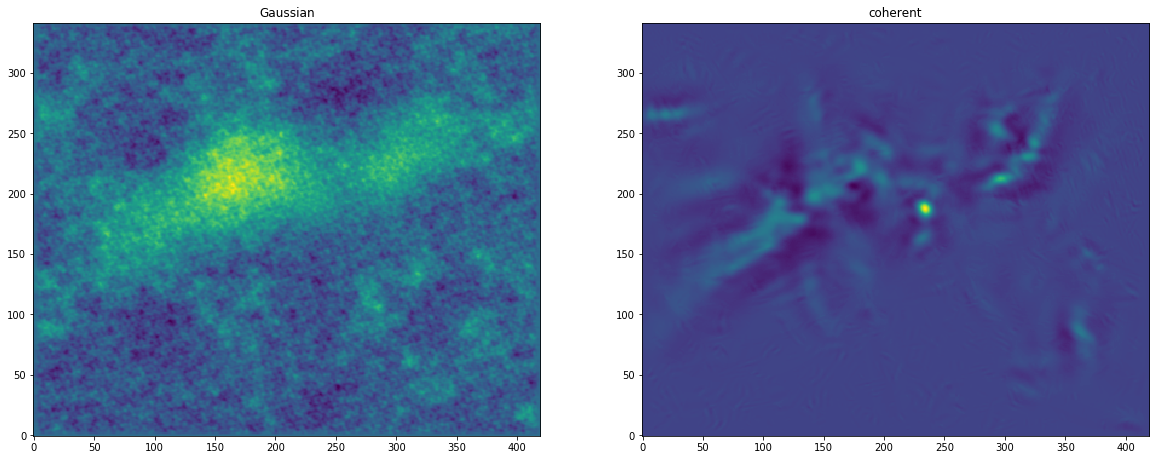

In [6]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

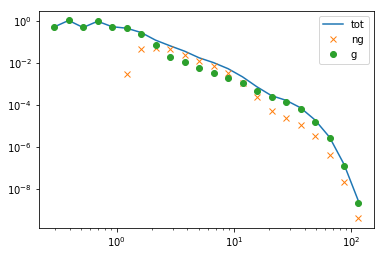

In [13]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [18]:
reso = header ['CDELT2']*60
M = nb_scale((34, 500,600))
N = header['NAXIS3']

In [16]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((34, 500,600))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98, arrdim = np.array([500,600]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/G353f_iso_cnts/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/G353f_iso_cnts/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/G353f_iso_cnts/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/G353f_iso_cnts/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/G353f_iso_cnts/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/G353f_iso_cnts/wave_k.npy",wave_k)

  0%|          | 0/22 [00:00<?, ?it/s]

data number 0
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 1
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 2
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 3
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 4
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 5
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 6
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 7
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 8
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 9
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 10
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 11
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 12
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 13
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 14
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 15
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 16
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 17
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 18
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 19
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 20
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 21
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 22
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 23
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 24
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 25
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 26
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 27
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 28
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 29
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 30
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 31
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 32
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 33
600 500


100%|██████████| 22/22 [00:16<00:00,  1.36it/s]


Text(0.5, 1.0, 'Coherent')

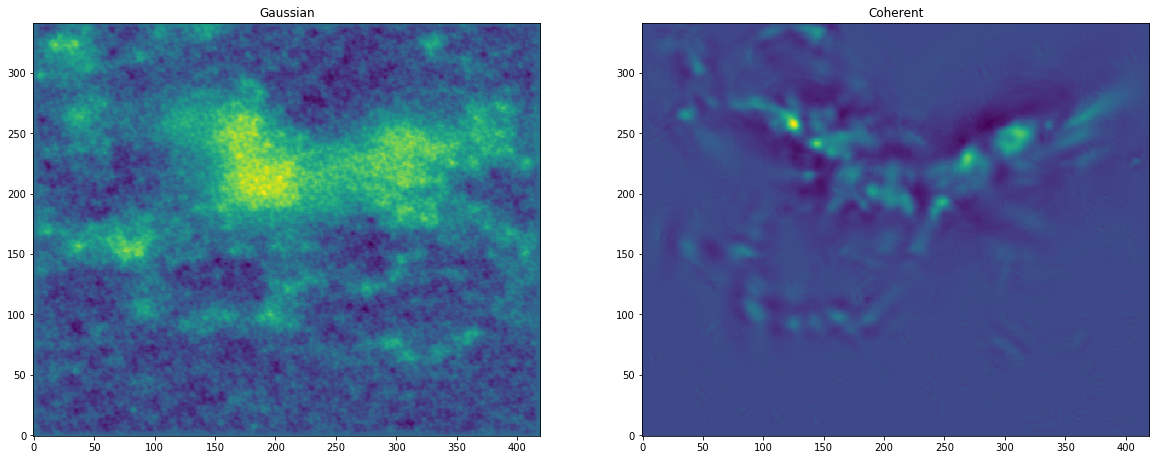

In [49]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/coh.npy")

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

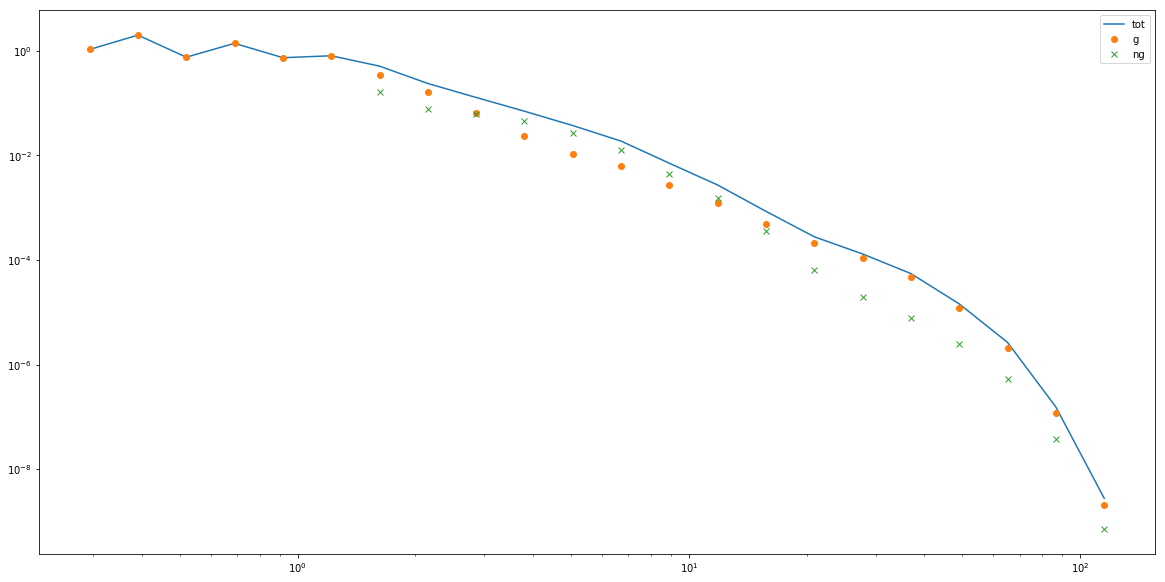

In [18]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/wave_k.npy")
plt.plot(wk, t[23],label="tot")
plt.plot(wk, g[23],"o",label="g")
plt.plot(wk, ng[23],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
## Sauvgarde all coherent scale

In [ ]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
coherent_tot = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((34, 500,600))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98, arrdim = np.array([500,600]))

    coherent = wt[M:2*M,:,:]
    #Gaussian = wt[2*M:3*M,:,:] 
    
    coherent_tot.append( coherent )

np.save("/user/workdir/soldanof/data/G353f_iso_cnts/cohScale.npy", coherent_tot)

  0%|          | 0/22 [00:00<?, ?it/s]

data number 0
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 1
600 500


 45%|████▌     | 10/22 [00:09<00:14,  1.17s/it]